<a href="https://colab.research.google.com/github/Deykoz/Machine-Learning-projects/blob/main/Multiple_Classification_Models/Multiple_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Find the best classification model**

In this project, we aim to classify individuals based on the severity of Obstructive Sleep Apnea (OSA) using several classification models. The goal is to predict the severity level of OSA, categorized into three classes according to the Apnea-Hypopnea Index (AHI):


*   <font color = green> Healthy </font>OSA (IAH <= 10)
*    <font color = orange>Moderate</font> OSA (IAH >10 and IAH <30)
*   <font color = red>Severe</font> OSA (IAH >= 30)

The features will be 'Age', 'BMI' and 'Cervical'.



The dataset used for this analysis has been provided by the Quirón Hospital of Málaga, containing data from patients who were analyzed using Polysomnography after OSA was suspected. The objective is to compare the performance of various classification models and determine which one provides the most accurate prediction of OSA severity. This project contributes to the development of more precise diagnostic tools for the clinical assessment and management of OSA patients.

In [ ]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('OSA_DB_UPM.xlsx')
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,BMI
0,P0002,hombre,29.6,119,56,174,48.0,39.305060
1,P0004,hombre,19.7,78,39,168,42.0,27.636054
2,P0005,hombre,9.0,80,32,173,40.0,26.729927
3,P0006,hombre,2.0,109,32,190,42.0,30.193906
4,P0007,hombre,34.0,86,39,169,42.0,30.110991


# EDA

           Weight         Age      Height    Cervical         BMI
count  637.000000  637.000000  637.000000  637.000000  637.000000
mean    87.733124   49.497645  171.284144   40.636578   29.863303
std     18.356730   12.386418    9.558128    3.957542    5.619622
min     45.000000   20.000000  144.000000   30.000000   18.289895
25%     75.000000   40.000000  165.000000   38.000000   26.037494
50%     86.000000   49.000000  171.000000   41.000000   28.731747
75%     98.000000   59.000000  178.000000   43.000000   32.770513
max    165.000000   88.000000  197.000000   53.000000   63.654952
OSA
Healthy     242
Moderate    229
Severe      166
Name: count, dtype: int64


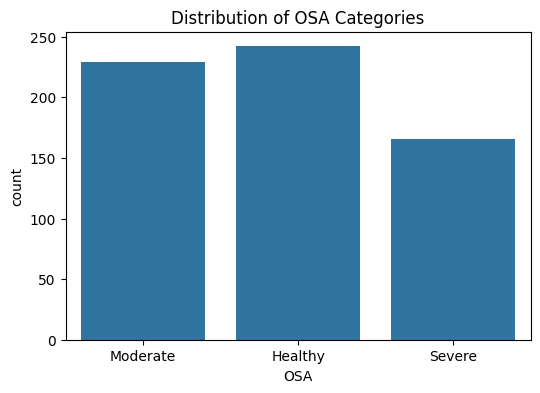

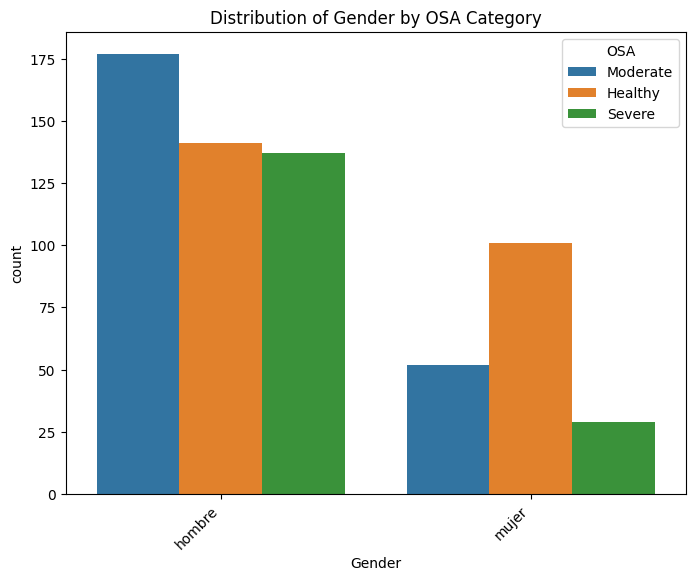

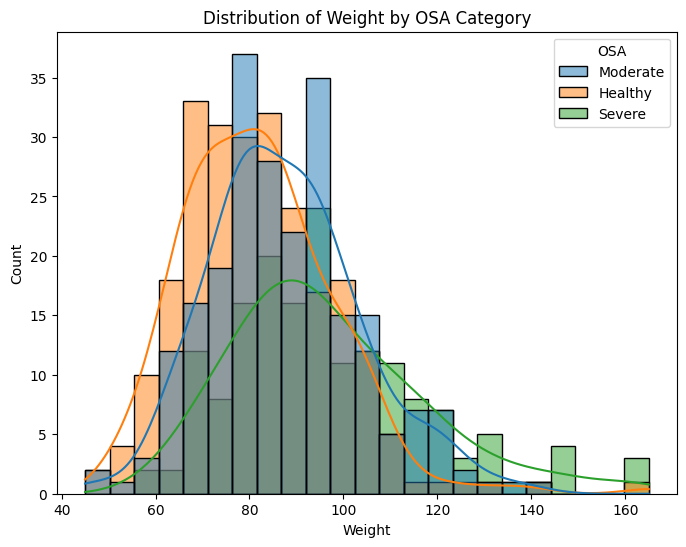

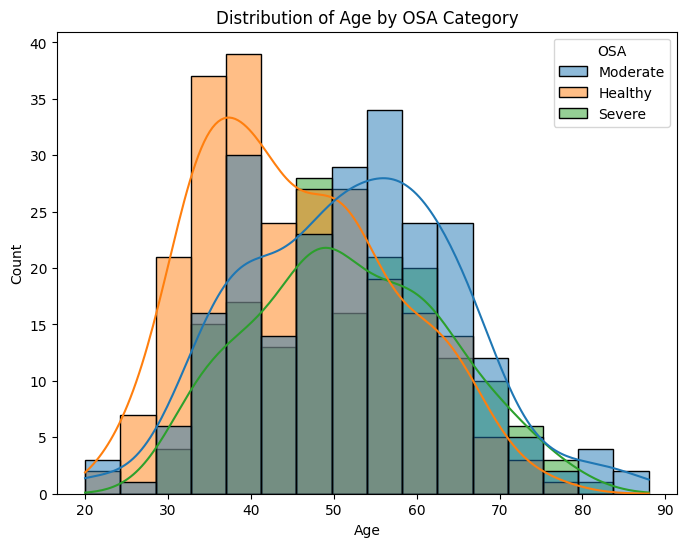

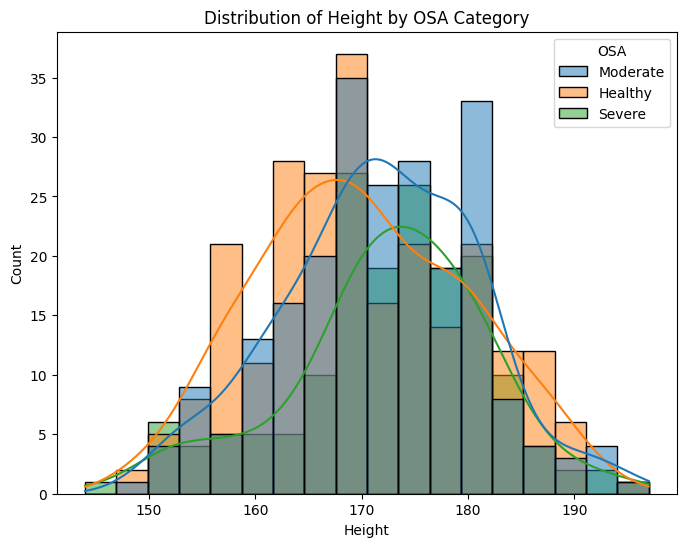

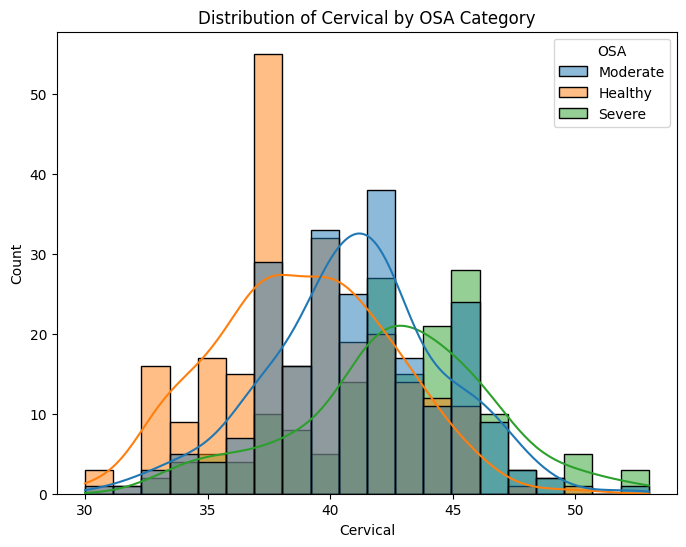

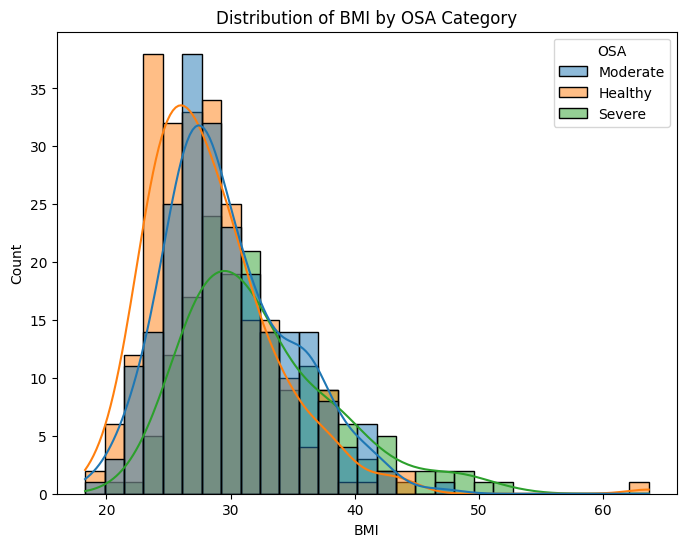

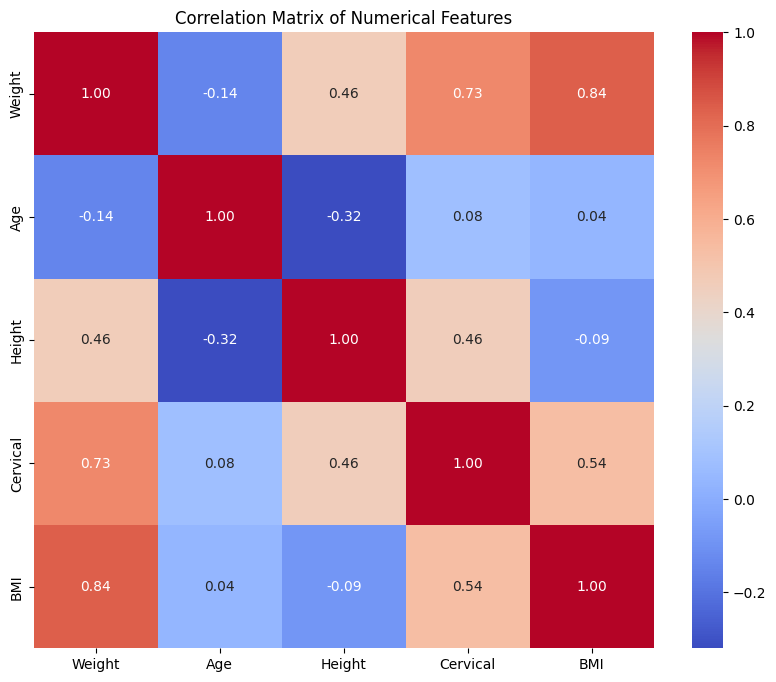

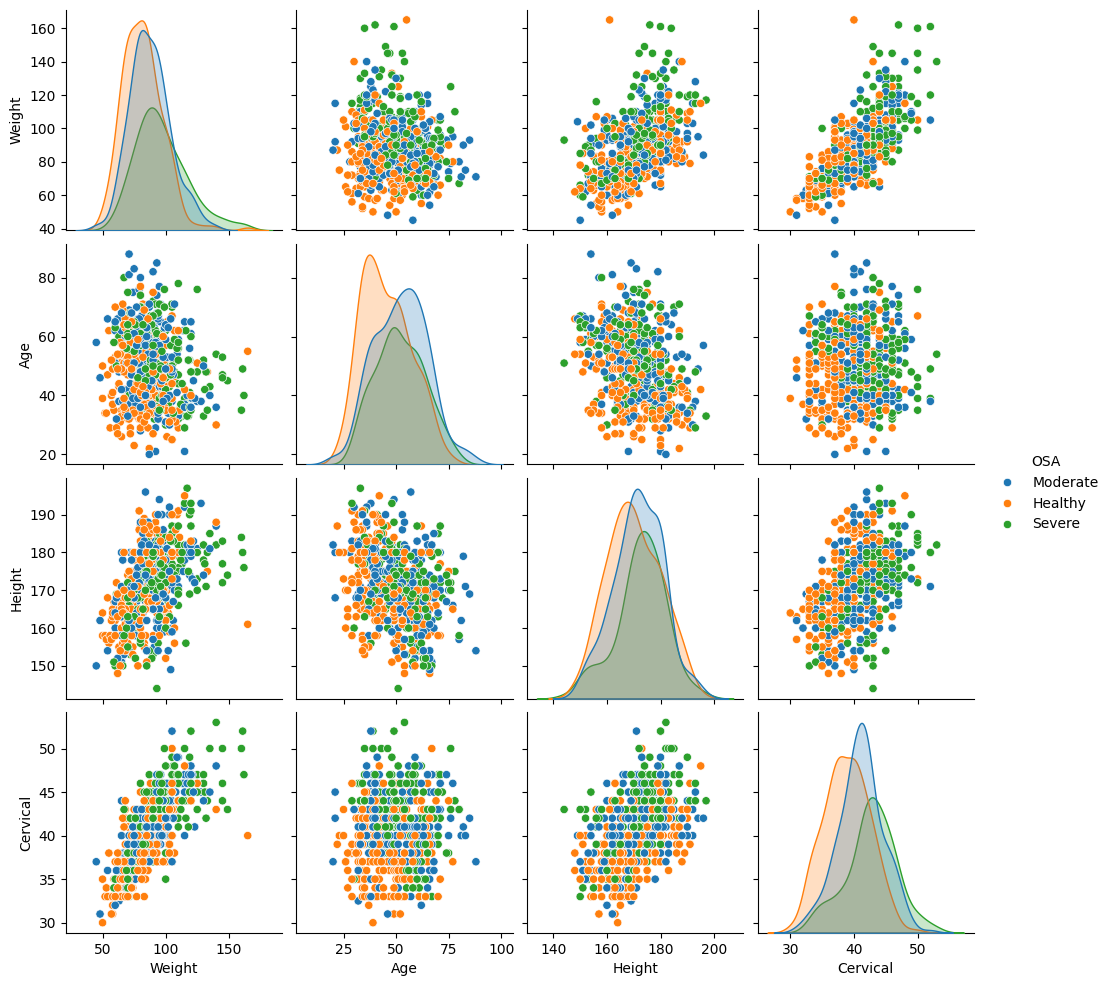

In [ ]:
#EDA for binary classification according to OSA column categories using the rest of features but Patient and IAH.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define OSA categories based on IAH
df['OSA'] = df['IAH'].apply(lambda x: 'Healthy' if x <= 10 else ('Severe' if x >= 30 else 'Moderate'))

# Drop Patient and IAH columns
df_eda = df.drop(['Patient', 'IAH'], axis=1)

# --- Exploratory Data Analysis ---
# 1. Summary Statistics
print(df_eda.describe())

# 2. Class Distribution
print(df_eda['OSA'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='OSA', data=df_eda)
plt.title('Distribution of OSA Categories')
plt.show()

# 3. Feature Distributions by OSA Category
for column in df_eda.columns[:-1]:  # Exclude the 'OSA' column itself
    if df_eda[column].dtype in ['int64', 'float64']:
      plt.figure(figsize=(8, 6))
      sns.histplot(data=df_eda, x=column, hue='OSA', kde=True)  # Use KDE for better visualization
      plt.title(f'Distribution of {column} by OSA Category')
      plt.show()
    elif df_eda[column].dtype == 'object':
      plt.figure(figsize=(8, 6))
      sns.countplot(x=column, hue='OSA', data=df_eda)
      plt.title(f'Distribution of {column} by OSA Category')
      plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
      plt.show()


# 4. Correlation Matrix (for numerical features)
numerical_features = df_eda.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Pairplots (for a subset of numerical features to avoid excessive plots)

# Example using the first 4 numerical features
sns.pairplot(data=df_eda, vars=numerical_features.columns[:4], hue='OSA') # Choose features and adjust as needed
plt.show()

# **Classification Model**

The seven classification algorithms we will look at are as follows:

* Logistic Regression
* Ridge Classifier
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Bagged Decision Trees (Bagging)
* Random Forest
* Stochastic Gradient Boosting

# Logistic Regression model

Logistic regression with the One-vs-Rest (OvR) strategy in order to deal with multiclass (3 in our case)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4765625
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        53
           1       0.71      0.14      0.23        37
           2       0.34      0.61      0.43        38

    accuracy                           0.48       128
   macro avg       0.56      0.45      0.43       128
weighted avg       0.56      0.48      0.45       128



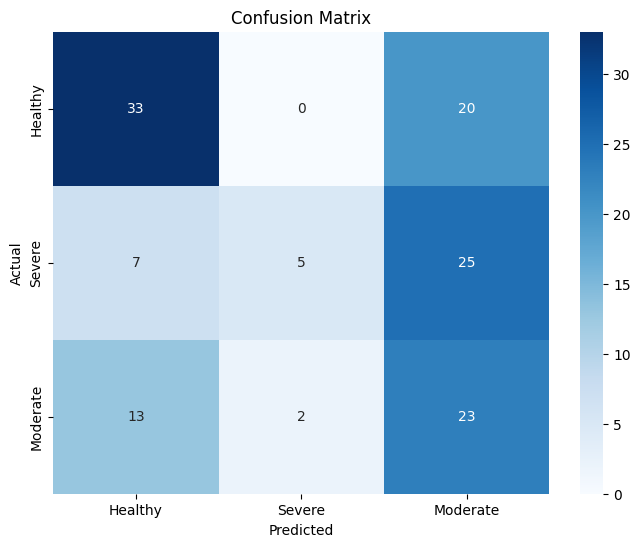

In [ ]:
#Train and test a Logistic Regression model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_eda is already created as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']

# Convert target variable 'OSA' to numerical labels
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', multi_class='ovr') # Use 'ovr' for multi-class classification
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Logistic regression with multimonial

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.46875
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        53
           1       0.67      0.32      0.44        37
           2       0.30      0.47      0.36        38

    accuracy                           0.47       128
   macro avg       0.52      0.45      0.46       128
weighted avg       0.53      0.47      0.48       128



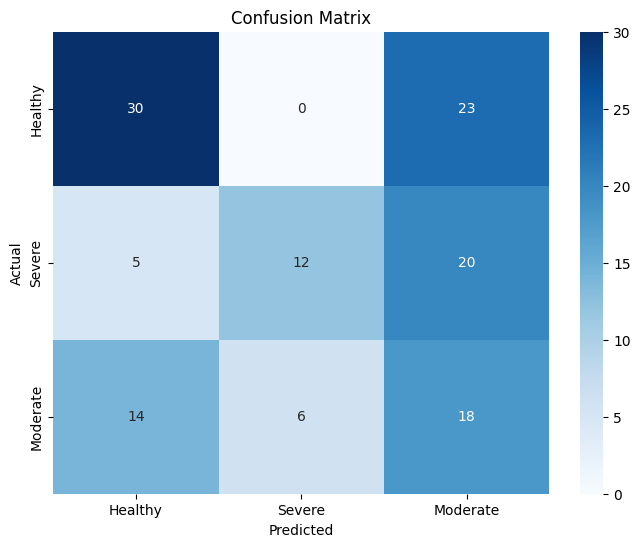

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_eda is already created as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']

# Convert target variable 'OSA' to numerical labels (0 and 1)
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial') # Use 'ovr' for multi-class classification
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Tuning of the hyperparameters**

Grid searching the key hyperparameters for LogisticRegression

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['ovr', 'multinomial']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,multi_class=multi_class)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.509689 using {'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.500265 (0.051366) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.500265 (0.051366) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
0.498702 (0.050953) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.508639 (0.057352) with: {'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
0.509160 (0.056628) with: {'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'liblinear'}
0.500265 (0.051366) with: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.500265 (0.051366) with: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
0.496619 (0.049862) with: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_

In [ ]:
# Use of the nested cross validation for finding the best parameter of the logistic regression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Load the dataset (assuming it's in the same directory or you've provided the correct path)
df = pd.read_excel('OSA_DB_UPM.xlsx')
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Define OSA categories
df['OSA'] = df['IAH'].apply(lambda x: 'Healthy' if x <= 10 else ('Severe' if x >= 30 else 'Moderate'))
df_eda = df.drop(['Patient', 'IAH'], axis=1)

# Prepare the data
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA'].map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})


# Define the model and parameter grid
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # Added more solvers
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['ovr']
grid = dict(solver=solvers, penalty=penalty, C=c_values, multi_class=multi_class)

# Define the nested cross-validation
inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # Inner CV
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # Outer CV


# Perform the nested cross-validation
nested_score = 0
for train_idx, test_idx in outer_cv.split(X, y):
  X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
  y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]

  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=inner_cv, scoring='accuracy', error_score=0)
  grid_search.fit(X_train_outer, y_train_outer)

  best_model = grid_search.best_estimator_
  nested_score += best_model.score(X_test_outer, y_test_outer)


print(f"Average accuracy from nested cross-validation: {nested_score / outer_cv.get_n_splits()}")
print(f"Best parameters found: {grid_search.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Average accuracy from nested cross-validation: 0.49504794973544974
Best parameters found: {'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Evaluate the model with the best parameters

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with best hyperparameters: 0.5
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        53
           1       0.79      0.30      0.43        37
           2       0.33      0.53      0.41        38

    accuracy                           0.50       128
   macro avg       0.58      0.48      0.49       128
weighted avg       0.58      0.50      0.50       128



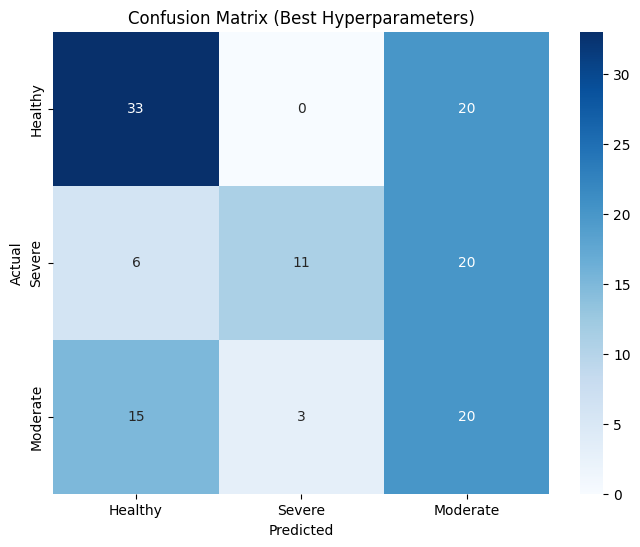

In [ ]:
# Access the best hyperparameters
best_params = grid_result.best_params_
best_params = {'C': 0.004, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
# Initialize the Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments :**


Performs reasonably for Healthy (0) with good recall (0.62).

Performs poorly for Severe (1) with a recall of just 0.30, leading to an imbalanced performance.

Moderate performance for Moderate (2) (precision: 0.33, recall: 0.53).

Logistic Regression struggles with the non-linearity and complexity of this problem.

Recall imbalance across classes indicates issues with separating Severe cases effectively.

Baysian Optimisation for finding the hyperparameter

In [ ]:
#Use of Bayesian Optimization to find the best hyperparameter for this Logistic regression model

!pip install bayesian-optimization

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# Assuming X, y are defined as in your previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})


def logreg_cv(C, solver, multi_class, penalty): # Changed the order to penalty to the last
    # penalty must be passed as string
    # Accessing elements from the lists based on the index
    solver_val = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'][int(solver)]
    multi_class_val = ['ovr', 'multinomial'][int(multi_class)]
    penalty_val = ['l2'][int(penalty)]

    model = LogisticRegression(C=C, penalty=penalty_val, solver=solver_val, multi_class=multi_class_val, max_iter=10000)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return np.mean(scores)

# Define the search space
pbounds = {
    'C': (0.01, 100),  # Adjust the range as needed
    'penalty': (0, 0),  # You can try 'l1', 'elasticnet' if solver allows # index to penalty list
    'solver': (0, 4), # index to solver list
    'multi_class': (0, 1)  # index to multi_class list
}
# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=logreg_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Perform the optimization
optimizer.maximize(init_points=5, n_iter=10)  # Adjust init_points and n_iter

# Print the best hyperparameters and score
optimizer.max

|   iter    |  target   |     C     | multi_... |  penalty  |  solver   |
-------------------------------------------------------------------------
| 1         | 0.4961    | 37.46     | 0.9507    | 0.0       | 2.395     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 2         | 0.4898    | 15.61     | 0.156     | 0.0       | 3.465     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 3         | 0.4883    | 60.12     | 0.7081    | 0.0       | 3.88      |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 4         | 0.4946    | 83.25     | 0.2123    | 0.0       | 0.7336    |
| 5         | 0.4946    | 30.43     | 0.5248    | 0.0       | 1.165     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 6         | 0.4946    | 95.66     | 0.3426    | 0.0       | 0.7534    |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 7         | 0.4946    | 36.35     | 0.6655    | 0.0       | 1.867     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 8         | 0.4883    | 40.41     | 0.8003    | 0.0       | 3.587     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 9         | 0.4946    | 37.82     | 0.8288    | 0.0       | 0.9781    |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 10        | 0.4867    | 36.81     | 0.4309    | 0.0       | 3.992     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 11        | 0.4946    | 37.5      | 0.09425   | 0.0       | 1.865     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 12        | 0.4946    | 38.48     | 0.9351    | 0.0       | 1.911     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 13        | 0.4946    | 32.29     | 0.4798    | 0.0       | 1.061     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 14        | 0.4961    | 31.43     | 0.5321    | 0.0       | 2.812     |


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

| 15        | 0.4867    | 29.86     | 0.1125    | 0.0       | 3.312     |


{'target': 0.49613681102362206,
 'params': {'C': 37.46026648354777,
  'multi_class': 0.9507143064099162,
  'penalty': 0.0,
  'solver': 2.3946339367881464}}

We can see that we obtained 0.49 accuracy which is lower that the accuracy we found with the grid search method

# Ridge classifier

Ridge Classifier Accuracy: 0.46875
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        53
           1       0.73      0.22      0.33        37
           2       0.31      0.50      0.38        38

    accuracy                           0.47       128
   macro avg       0.54      0.45      0.44       128
weighted avg       0.55      0.47      0.46       128



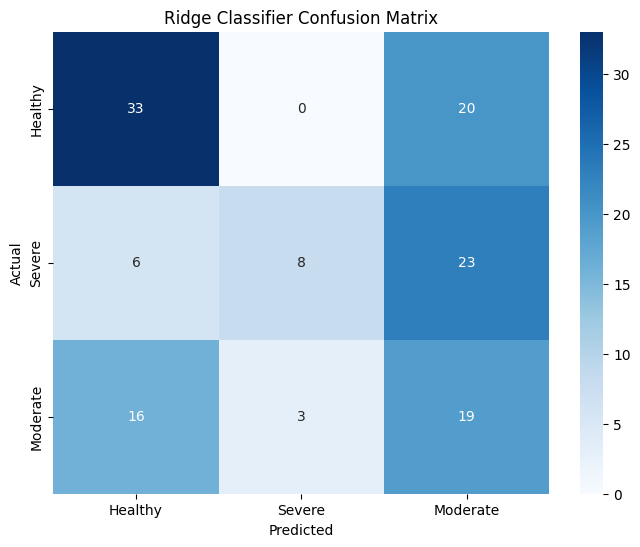

In [ ]:
# Train and test a Ridge Classifier model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Ridge Classifier model
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Ridge Classifier Accuracy: {accuracy_ridge}")
print(classification_report(y_test, y_pred_ridge))

# Confusion Matrix
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ridge, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Ridge Classifier Confusion Matrix")
plt.show()

**Tunning of the hyperparameter**

The most important parameter to tune might be the regularization strength (alpha).

In [ ]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define models and parameters
model = RidgeClassifier()
alpha = [0.001,0.1, 0.2, 1, 10, 100, 490, 550, 480, 600, 500, 200, 1000]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.498156 using {'alpha': 490}
0.495023 (0.049609) with: {'alpha': 0.001}
0.495023 (0.049609) with: {'alpha': 0.1}
0.495023 (0.049609) with: {'alpha': 0.2}
0.495023 (0.049609) with: {'alpha': 1}
0.495023 (0.048447) with: {'alpha': 10}
0.495023 (0.048447) with: {'alpha': 100}
0.498156 (0.046682) with: {'alpha': 490}
0.497636 (0.046221) with: {'alpha': 550}
0.498156 (0.046682) with: {'alpha': 480}
0.497636 (0.046221) with: {'alpha': 600}
0.498156 (0.046682) with: {'alpha': 500}
0.496073 (0.046214) with: {'alpha': 200}
0.496057 (0.046928) with: {'alpha': 1000}


The grid search results indicate that the best performance occurs with an alpha value of 490 and accuracy score of 0.4982, which is very similar to the results obtained for alpha values between 0.001 and 1000. Specifically, the accuracy remains around 0.4950, with only slight variations in the standard deviation (ranging from 0.0462 to 0.0496) across the different values of alpha.

The results suggest that for this specific dataset and the Ridge Classifier model, the choice of alpha does not have a strong impact on the overall performance

**Best parameters**

Accuracy with best hyperparameters: 0.484375
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        53
           1       0.80      0.22      0.34        37
           2       0.32      0.53      0.40        38

    accuracy                           0.48       128
   macro avg       0.58      0.46      0.45       128
weighted avg       0.58      0.48      0.48       128



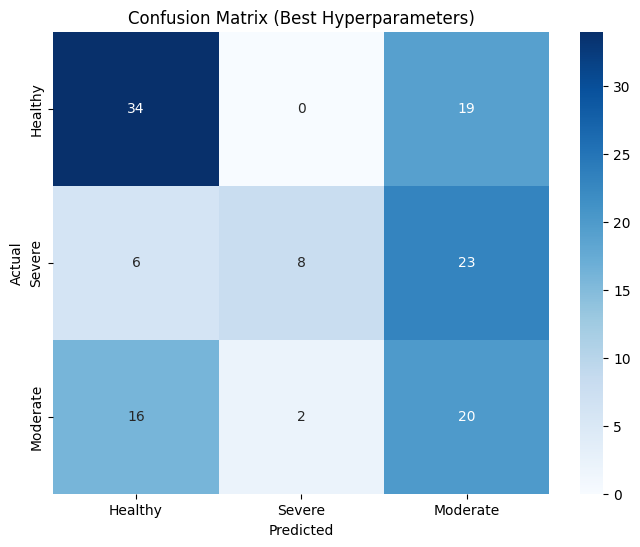

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'alpha':305}
# Initialize the Logistic Regression model with the best hyperparameters
best_model = RidgeClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

Similar to Logistic Regression in performance trends:

*  Slightly better performance for Healthy (0).
*  Very poor recall for Severe (1) (0.22), suggesting this model also struggles with this class.
*  Moderate (2) has comparable metrics to Logistic Regression.

This linear model's limitations are evident; it struggles with the complex feature-target relationship.

# K-Nearest Neighbors (KNN)

KNN Classifier Accuracy: 0.40625
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        53
           1       0.41      0.43      0.42        37
           2       0.24      0.24      0.24        38

    accuracy                           0.41       128
   macro avg       0.39      0.39      0.39       128
weighted avg       0.41      0.41      0.41       128



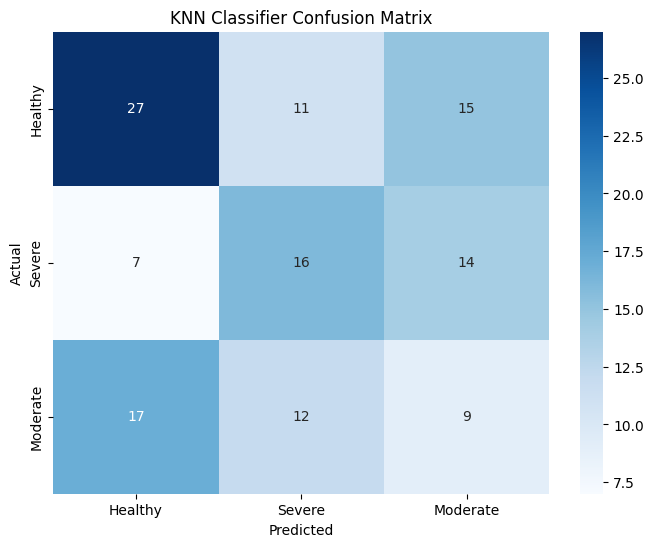

In [ ]:
# prompt: Train and test a K-Nearest Neighbors Classifier model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier() # You can specify n_neighbors here if needed
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Classifier Confusion Matrix")
plt.show()

**Key hyperparametres for KNeighborsClassifier**

The most important hyperparameter for KNN is the number of neighbors (n_neighbors).
It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.494585 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.432316 (0.065118) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.432316 (0.065118) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.417121 (0.048139) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.430737 (0.059681) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.443254 (0.056555) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.437021 (0.055657) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.457862 (0.050384) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.454324 (0.060673) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.461111 (0.061594) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.455473 (0.070163) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.471511 

**Best parameter results**

Accuracy with best hyperparameters: 0.53125
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        53
           1       0.50      0.41      0.45        37
           2       0.40      0.50      0.45        38

    accuracy                           0.53       128
   macro avg       0.52      0.52      0.52       128
weighted avg       0.54      0.53      0.53       128



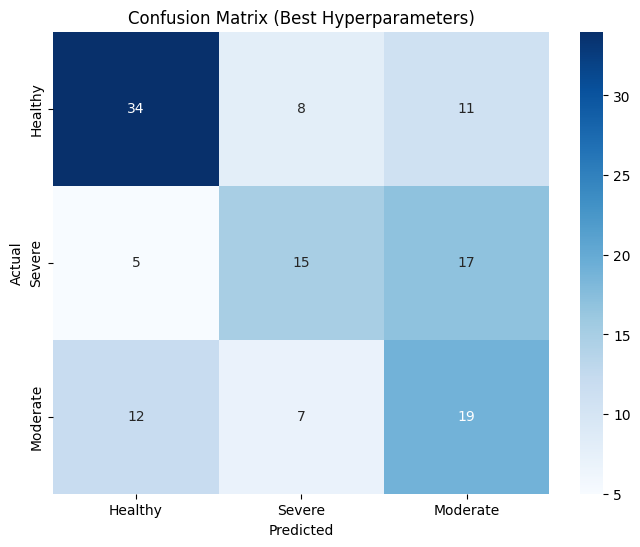

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params ={'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
# Initialize the Logistic Regression model with the best hyperparameters
best_model = KNeighborsClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

*   Best performance for Healthy (0) with decent precision and recall (0.67, 0.64).
*  Moderate for Severe (1) but still low (recall: 0.41).
*  Reasonable performance for Moderate (2) (recall: 0.50).

KNN improves over linear models due to its non-parametric nature.
Performance likely depends heavily on hyperparameter tuning (e.g., the number of neighbors).

# Support Vector Machine (SVM)

SVM Classifier Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        53
           1       0.78      0.19      0.30        37
           2       0.35      0.68      0.46        38

    accuracy                           0.50       128
   macro avg       0.61      0.49      0.47       128
weighted avg       0.61      0.50      0.49       128



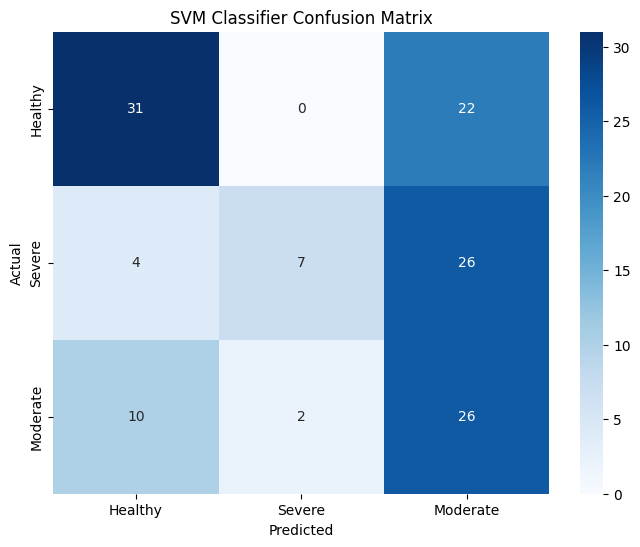

In [ ]:
#Train and test a SVM Classifier model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.svm import SVC

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SVM Classifier model
svm_model = SVC()  # You can specify kernel, C, and other parameters here
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Classifier Confusion Matrix")
plt.show()

**Key hyperparametres for SVM**

One of the key parameters to consider is the selection of the kernel, which determines how the input variables are mapped. While there are several options available, the most commonly used are linear, polynomial, and RBF, with linear and RBF being the most frequently applied in practice.

Be careful (10 mins running of compilation)

In [ ]:
"""
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

Best: 0.507027 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.489178 (0.050331) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.493990 (0.049725) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.379936 (0.007401) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.488624 (0.050477) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.500777 (0.058483) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.379936 (0.007401) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.496511 (0.046726) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.507027 (0.050724) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.379936 (0.007401) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.502307 (0.050420) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.476620 (0.041771) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.379936 (0.007401) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.500744 (0.047902) with: {'C': 0.01, 'gamma': 'scale',

**Best parameter results**

Accuracy with best hyperparameters: 0.515625
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        53
           1       0.82      0.24      0.38        37
           2       0.36      0.66      0.47        38

    accuracy                           0.52       128
   macro avg       0.62      0.50      0.49       128
weighted avg       0.62      0.52      0.51       128



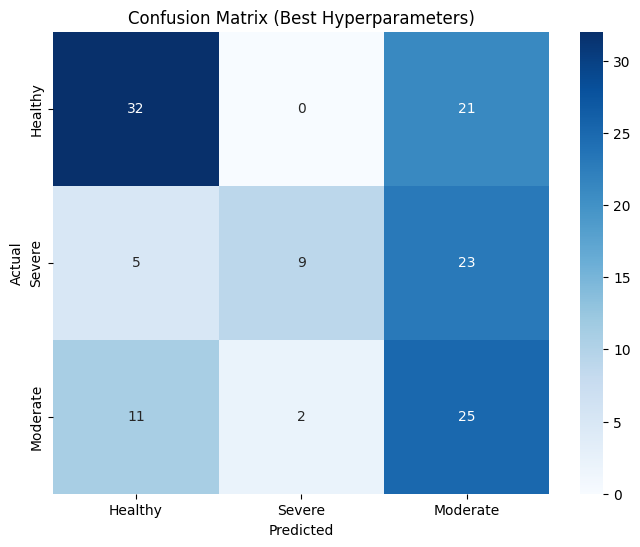

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = ['poly', 'rbf', 'sigmoid']


best_params = {
    'kernel': 'rbf', # Choose one kernel
    'C': 1.4,       # Choose one value for C
    'gamma': 'scale'
}
# Initialize the Logistic Regression model with the best hyperparameters
best_model =  SVC(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**



*   Good precision for Severe (1) but poor recall (0.24).
*   Decent recall for Moderate (2) (0.66) but low precision (0.36).

SVM struggles with recall for Severe cases, showing difficulty balancing class performance.
Likely sensitive to class imbalance and feature scaling



# Bagged Decision Trees (Bagging)

Bagging Classifier Accuracy: 0.4765625
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        53
           1       0.48      0.41      0.44        37
           2       0.35      0.50      0.41        38

    accuracy                           0.48       128
   macro avg       0.49      0.47      0.47       128
weighted avg       0.51      0.48      0.48       128



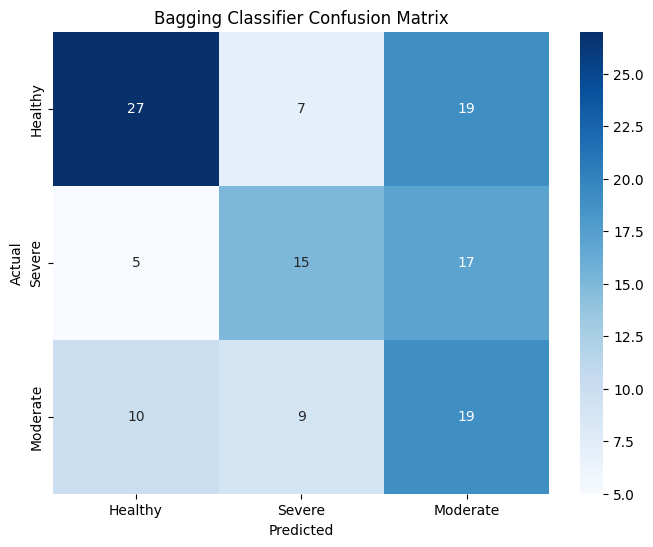

In [ ]:
#Train and test a Bagged Decision Trees (Bagging)Classifier model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Bagging Classifier model
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging}")
print(classification_report(y_test, y_pred_bagging))

# Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bagging Classifier Confusion Matrix")
plt.show()

**Key hyperparametres for Bagged Decision Trees (Bagging)**

The most important parameter for bagged decision trees is the number of trees (n_estimators).



In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 50, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.469436 using {'n_estimators': 1000}
0.464244 (0.071223) with: {'n_estimators': 10}
0.464716 (0.051883) with: {'n_estimators': 50}
0.465236 (0.049561) with: {'n_estimators': 100}
0.469436 (0.056032) with: {'n_estimators': 1000}


**Best paramaeter results**

Accuracy with best hyperparameters: 0.5
              precision    recall  f1-score   support

           0       0.67      0.58      0.63        53
           1       0.47      0.46      0.47        37
           2       0.35      0.42      0.38        38

    accuracy                           0.50       128
   macro avg       0.50      0.49      0.49       128
weighted avg       0.52      0.50      0.51       128



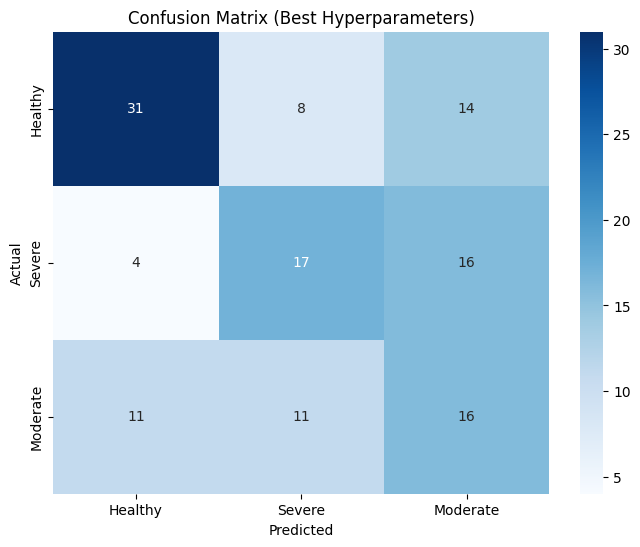

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = ['poly', 'rbf', 'sigmoid']


best_params = {
    'estimator':DecisionTreeClassifier(random_state=42), 'n_estimators':10,
    'random_state': 42  }
# Initialize the Logistic Regression model with the best hyperparameters
best_model = BaggingClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

* Inconsistent results, likely due to sensitivity to randomness and data splits.
* Precision and recall metrics are average across all classes.

Bagging improves over linear models but lacks stability.
Randomness without proper balancing (e.g., stratified sampling) affects results.

# Random Forest Classifier

Accuracy: 0.421875
              precision    recall  f1-score   support

           0       0.58      0.49      0.53        53
           1       0.41      0.30      0.34        37
           2       0.30      0.45      0.36        38

    accuracy                           0.42       128
   macro avg       0.43      0.41      0.41       128
weighted avg       0.45      0.42      0.43       128



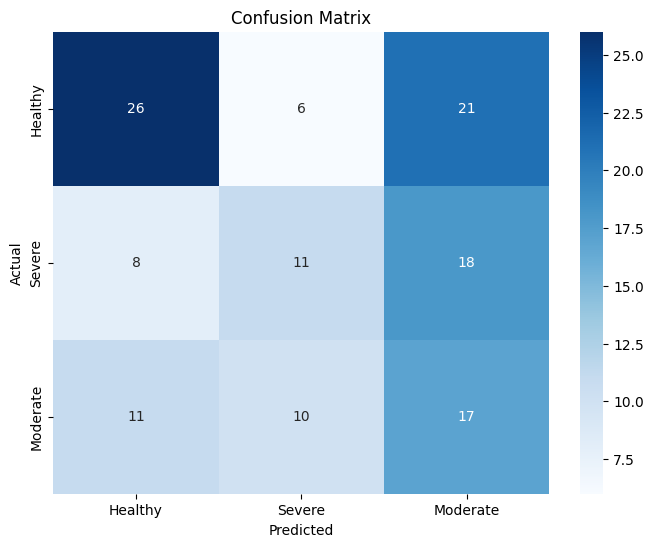

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_eda is already created as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']

# Convert target variable 'OSA' to numerical labels (0 and 1)
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42) # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Key hyperparametres for Random Forest**

The most important parameter is the number of random features to sample at each split point (max_features) and the number of trees (n_estimators).

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.470015 using {'max_features': 'log2', 'n_estimators': 10}
0.459466 (0.060465) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.456349 (0.056908) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.463773 (0.054652) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.470015 (0.055763) with: {'max_features': 'log2', 'n_estimators': 10}
0.458986 (0.056332) with: {'max_features': 'log2', 'n_estimators': 100}
0.459565 (0.053556) with: {'max_features': 'log2', 'n_estimators': 1000}


**Best parameters**

Accuracy with best hyperparameters: 0.4296875
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        53
           1       0.36      0.32      0.34        37
           2       0.28      0.32      0.30        38

    accuracy                           0.43       128
   macro avg       0.41      0.41      0.41       128
weighted avg       0.43      0.43      0.43       128



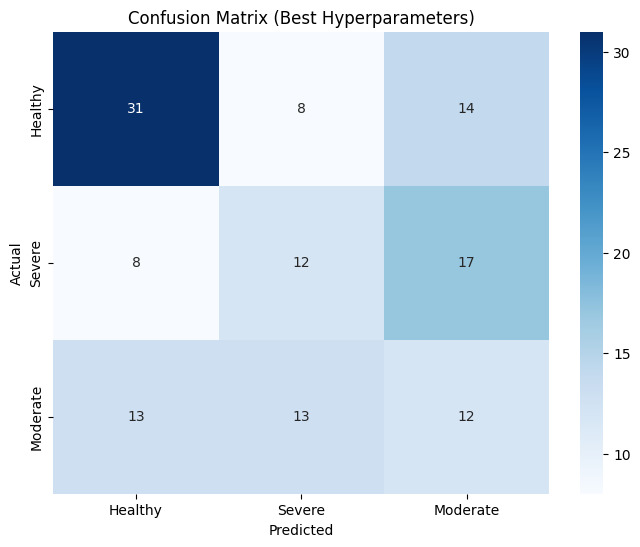

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = ['poly', 'rbf', 'sigmoid']


best_params = {
    'max_features':'sqrt', 'n_estimators':10,
    'random_state': 42  }
# Initialize the Logistic Regression model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

* Healthy (0) has reasonable performance (precision: 0.60, recall: 0.58).
* Severe (1) and Moderate (2) have low precision and recall.

Random Forest underperforms compared to Bagging, possibly due to insufficient depth or tree count.
Likely prone to overfitting or underfitting depending on hyperparameter settings.

# Stochastic Gradient Boosting

The Stochastic Gradient Boosting Classifier is a variant of the traditional Gradient Boosting model that incorporates a stochastic (random) element into the learning process. While standard Gradient Boosting builds each tree sequentially to correct the errors of the previous trees, Stochastic Gradient Boosting introduces randomness by training each new tree on a random subset of the data rather than the full dataset. This randomization helps reduce overfitting by preventing the model from becoming too finely tuned to the training data. By averaging the predictions of several trees trained on different data subsets, the model achieves better generalization, making it more robust when applied to new, unseen data. This approach can be particularly useful when dealing with noisy datasets or large numbers of features, as it promotes a more flexible and less overfitted model.





Stochastic Gradient Boosting Classifier Accuracy: 0.46875
              precision    recall  f1-score   support

           0       0.65      0.49      0.56        53
           1       0.43      0.32      0.37        37
           2       0.37      0.58      0.45        38

    accuracy                           0.47       128
   macro avg       0.48      0.46      0.46       128
weighted avg       0.50      0.47      0.47       128



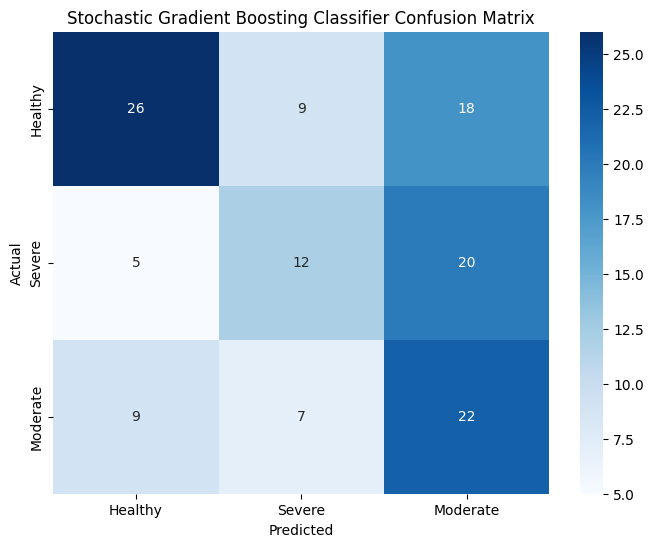

In [ ]:
#Train and test a Stochastic Gradient Boosting Classifier model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.ensemble import GradientBoostingClassifier

# Assuming X and y are already defined
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Stochastic Gradient Boosting Classifier
sgb_model = GradientBoostingClassifier(random_state=42) # You can adjust hyperparameters here
sgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sgb = sgb_model.predict(X_test)

# Evaluate the model
accuracy_sgb = accuracy_score(y_test, y_pred_sgb)
print(f"Stochastic Gradient Boosting Classifier Accuracy: {accuracy_sgb}")
print(classification_report(y_test, y_pred_sgb))

# Confusion Matrix
cm_sgb = confusion_matrix(y_test, y_pred_sgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Stochastic Gradient Boosting Classifier Confusion Matrix")
plt.show()

**Key hyperparametres for Stochastic Gradient Boosting**

The gradient boosting algorithm has several parameters that need to be tuned.

Some important parameter pairings to consider include the learning rate (also known as shrinkage or eta, learning_rate) and the number of trees in the model. Another key pairing is the subsample size (the fraction of data used for each tree) and the maximum depth of each tree (max_depth). These parameters could be optimized through grid search, testing values at intervals of 0.1 for the learning rate and 1 for the maximum depth. Alternatively, common values can be tested directly.

**Too long too compile !!**

In [ ]:
"""
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

KeyboardInterrupt: 

**Best parameters results**

Accuracy with best hyperparameters: 0.5546875
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        53
           1       0.62      0.54      0.58        37
           2       0.41      0.63      0.49        38

    accuracy                           0.55       128
   macro avg       0.59      0.56      0.56       128
weighted avg       0.60      0.55      0.56       128



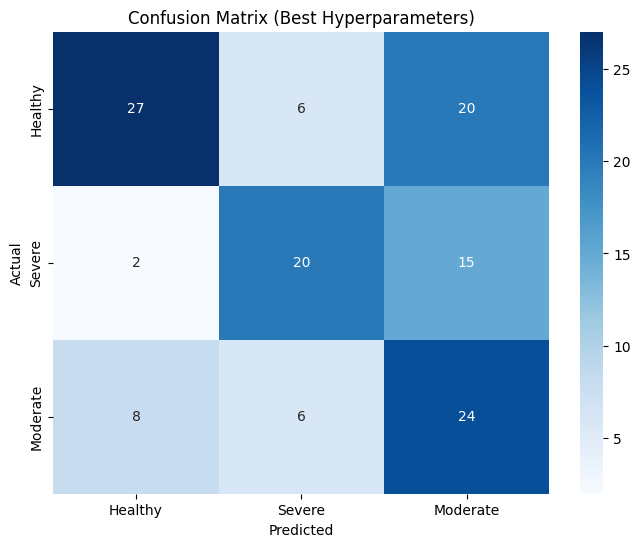

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


best_params = { 'random_state': 42,
     'n_estimators':7,
    'learning_rate' :0.3,
     'subsample': 0.54,
  'max_depth': 3 }
# Initialize the Logistic Regression model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

* Best performance for Healthy (0) (precision: 0.73, recall: 0.51).
* Moderate performance for Severe (1) and Moderate (2).


Gradient Boosting outperforms other models due to its ability to capture non-linearity.

However, it still struggles with imbalanced class distributions, especially for Severe cases.

**Precision, Recall, and F1-Score:**

Class 0:

* Precision: 0.73 — The model is relatively good at identifying class 0 instances correctly when it predicts class 0. This indicates that when the model classifies an instance as belonging to class 0, it is correct 73% of the time.
* Recall: 0.51 — However, it only correctly identifies 51% of all the actual instances of class 0. This suggests that there are many false negatives (instances of class 0 incorrectly classified as other classes).
* F1-Score: 0.60 — The balance between precision and recall for class 0 is moderate, with the F1 score indicating a reasonable trade-off between the two metrics. The model performs moderately well for this class.

Class 1:

* Precision: 0.62 — The model correctly identifies 62% of the instances it classifies as class 1.
* Recall: 0.54 — The model identifies 54% of the actual class 1 instances. While precision is fairly good, recall is still relatively moderate, indicating a slightly higher number of false negatives for this class.
* F1-Score: 0.58 — The F1 score shows a fair balance between precision and recall, though it is lower than for class 0, suggesting that performance for this class is less optimal.

Class 2:

* Precision: 0.41 — The model struggles with identifying class 2 correctly, as it only has 41% precision. This indicates a high rate of false positives for this class (other classes being misclassified as class 2).
* Recall: 0.63 — On the other hand, recall for class 2 is much better at 63%, meaning it correctly identifies 63% of actual class 2 instances. This suggests that while the model detects many instances of class 2, it does so with a relatively high number of misclassifications.
* F1-Score: 0.49 — The F1 score for class 2 is quite low, indicating poor overall performance for this class. While the recall is decent, the low precision leads to a suboptimal F1 score.


**Accuracy:**


The accuracy of 55% reflects the overall proportion of correct predictions made by the model. While it is the best among the models tested, it still suggests room for improvement, especially given that class 2 has particularly poor precision and the model seems to struggle with imbalanced class distributions.

**Macro Average:**

* Precision (0.59): The macro average precision indicates that, on average, across all classes, the model has a 59% precision rate. This suggests that the model has a moderate ability to classify instances correctly, but there is room for improvement, particularly for class 2.
* Recall (0.56): The macro average recall is 56%, which means the model is capturing about half of the true instances across all classes. This indicates that there may be significant room for improving the model's ability to identify true positives, especially for classes with lower recall (like class 0 and class 1).
* F1-Score (0.56): The macro average F1 score of 56% indicates a reasonable but not exceptional balance between precision and recall. This aligns with the fact that the model is performing decently but not optimally across the different classes.

**Weighted Average:**

* Precision (0.60): The weighted average precision is slightly higher than the macro average, which suggests that classes with higher support (more instances) are contributing more to the overall performance.
* Recall (0.55): The weighted average recall is 55%, reflecting that the model is doing a slightly better job at classifying instances across all classes when taking class imbalance into account.
* F1-Score (0.56): The weighted average F1 score mirrors the macro average, indicating that the model is not performing exceptionally well overall, but it still manages to find a reasonable balance between precision and recall.

**Confusion Matrix**

Class Healthy:

* True Positives (TP): 27 — The model correctly predicts 27 instances of Healthy.
* False Negatives (FN): 6 (Healthy predicted as Severe) + 20 (Healthy predicted as Moderate) = 26 — The model incorrectly classifies 26 Healthy instances as either Severe or Moderate. This indicates that the model is making significant errors in classifying Healthy cases.

Class Severe:

* True Positives (TP): 20 — The model correctly predicts 20 instances of Severe.
* False Negatives (FN): 2 (Severe predicted as Healthy) + 15 (Severe predicted as Moderate) = 17 — The model misclassifies 17 Severe cases as either Healthy or Moderate, suggesting that the model struggles to differentiate Severe instances from the other classes.

Class Moderate:

* True Positives (TP): 24 — The model correctly predicts 24 instances of Moderate.
* False Negatives (FN): 8 (Moderate predicted as Healthy) + 6 (Moderate predicted as Severe) = 14 — The model misclassifies 14 Moderate instances as either Healthy or Severe.

# Decision tree

In [ ]:
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
# Convert target variable 'OSA' to numerical labels (0 and 1)
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# prompt: Train and test a Decision tree model where OSA column is the target and features are Age, BMI and Cervical.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")


Accuracy of the Decision Tree model: 0.4453125


**Key hyperparametres for Decision tree**

In [ ]:
#Finding of the best hyperameter of this model with  nested cross-validation

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

df_eda = df.drop(['Patient', 'IAH'], axis=1)
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
# Convert target variable 'OSA' to numerical labels (0 and 1)
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation with GridSearchCV
nested_cv_results = cross_val_score(
    GridSearchCV(clf, param_grid, cv=inner_cv, scoring='accuracy'),
    X, y, cv=outer_cv, scoring='accuracy'
)

print(f"Nested CV Accuracy Scores: {nested_cv_results}")
print(f"Mean Nested CV Accuracy: {nested_cv_results.mean()}")
# Find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=inner_cv, scoring='accuracy')
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Nested CV Accuracy Scores: [0.5234375  0.4609375  0.48031496 0.51181102 0.41732283]
Mean Nested CV Accuracy: 0.4787647637795276
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.4834399606299213


**Best Parameter results**

Accuracy with best hyperparameters: 0.515625
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        53
           1       0.44      0.49      0.46        37
           2       0.42      0.55      0.48        38

    accuracy                           0.52       128
   macro avg       0.53      0.52      0.51       128
weighted avg       0.55      0.52      0.52       128



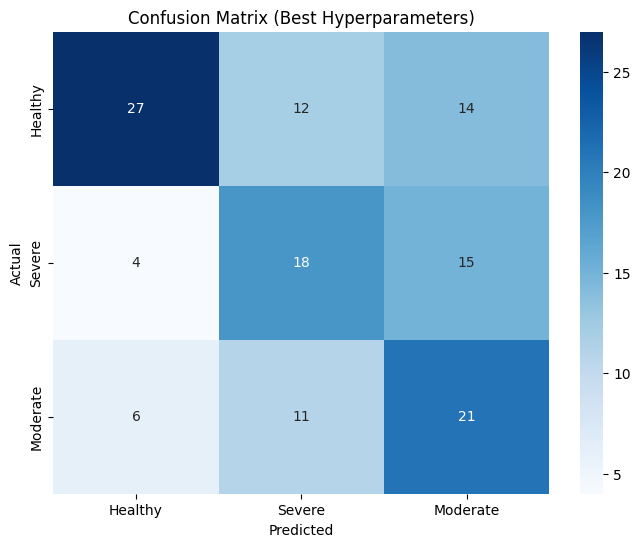

In [ ]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X and y are already defined as in the previous code
X = df_eda[['Age', 'BMI', 'Cervical']]
y = df_eda['OSA']
y = y.map({'Healthy': 0, 'Severe': 1, 'Moderate': 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


best_params ={ 'random_state':42, 'max_depth': 5,
    'min_samples_split':10,
    'min_samples_leaf': 5 }
# Initialize the Logistic Regression model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Severe', 'Moderate'],
            yticklabels=['Healthy', 'Severe', 'Moderate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best Hyperparameters)")
plt.show()

**Comments**

* Good recall for Healthy (0) (0.51).
* Low precision and recall for Severe (1) and Moderate (2).


**Visualization of the tree**

In [ ]:
clf = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)

model = clf.fit(X, y)

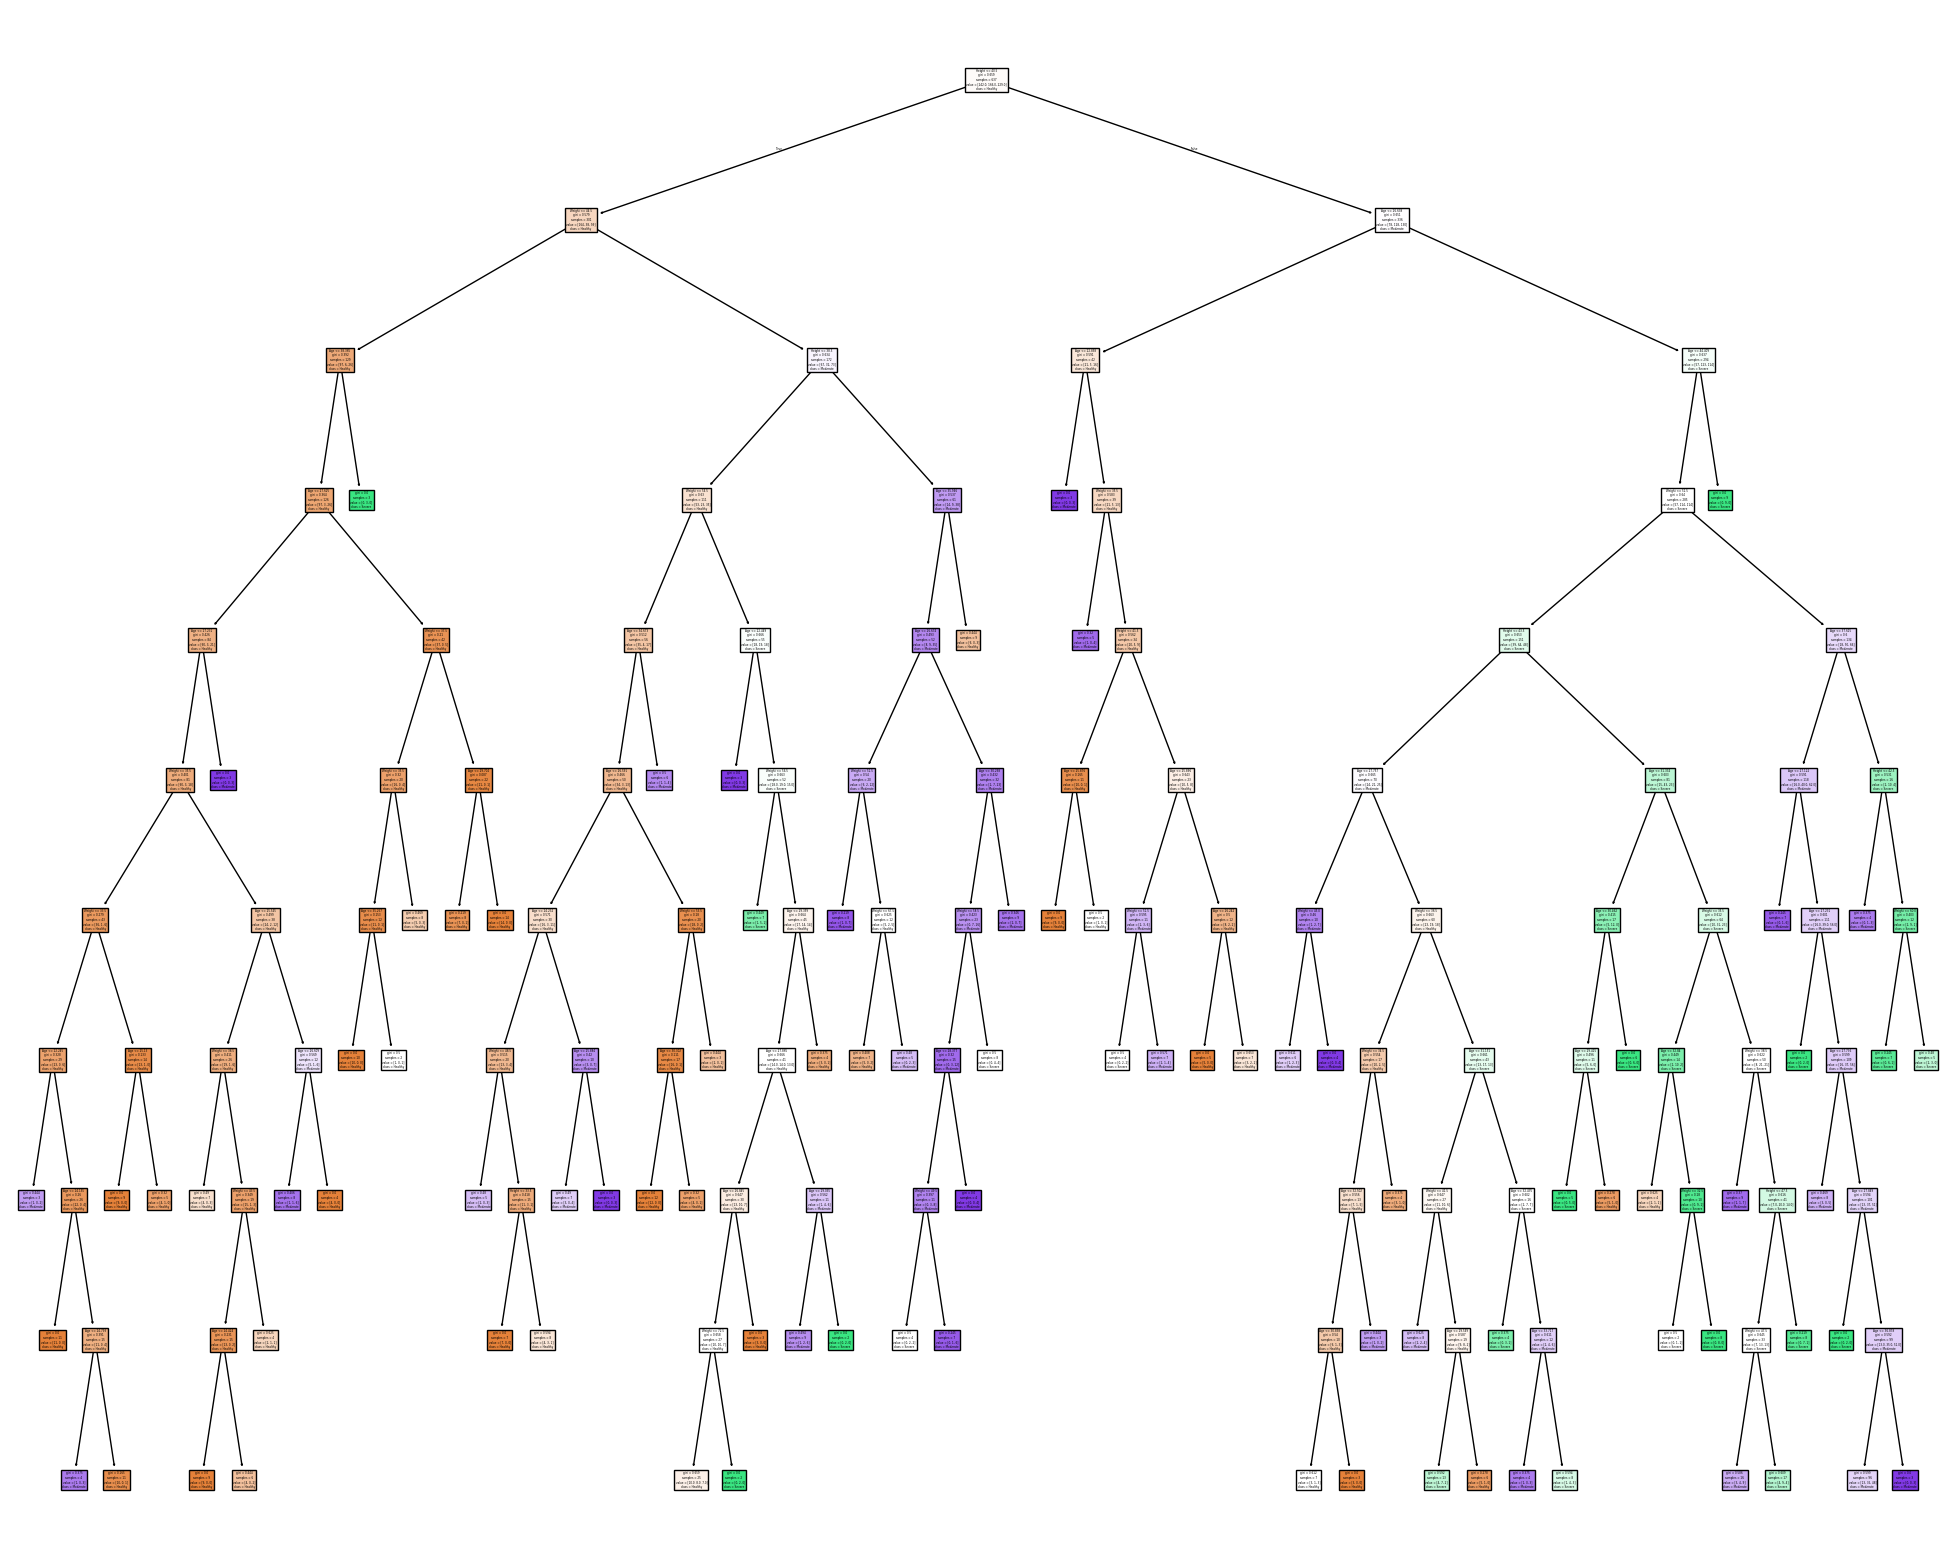

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Get all the columns from the dataframe.
columns = df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["Patient","Gender","IAH","OSA"]]
fig = plt.figure(figsize=(25,20))
# The original class_names argument only had 'Healthy' and 'Severe'.
# We need to include 'Moderate' to match the unique values in the target variable.
_ = tree.plot_tree(model,
                   feature_names = columns,
                   class_names = ['Healthy', 'Severe', 'Moderate'], # Updated class_names
                   filled=True)

In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': [],
    'Accuracy': [],
    'Best Hyperparameters': []
}

# KNN Results (replace with actual values from your code)
results['Model'].append('KNN')
results['Accuracy'].append(accuracy_knn)  # Assuming accuracy_knn is defined
results['Best Hyperparameters'].append(grid_result.best_params_) # Assuming grid_result is defined

# SVM Results (replace with actual values from your code)
results['Model'].append('SVM')
results['Accuracy'].append(accuracy_svm) # Assuming accuracy_svm is defined
#  Add best hyperparameters for SVM if you uncomment the SVM GridSearchCV section
# results['Best Hyperparameters'].append(grid_result.best_params_)

# Bagging Results
results['Model'].append('Bagging')
results['Accuracy'].append(accuracy_bagging) # Assuming accuracy_bagging is defined
results['Best Hyperparameters'].append(grid_result.best_params_)

# Random Forest Results
results['Model'].append('Random Forest')
results['Accuracy'].append(accuracy) # Assuming accuracy is defined
results['Best Hyperparameters'].append(grid_result.best_params_)

# Stochastic Gradient Boosting Results
results['Model'].append('Stochastic Gradient Boosting')
results['Accuracy'].append(accuracy_sgb)  # Assuming accuracy_sgb is defined
# Add best hyperparameters for SGB if you uncomment the SGB GridSearchCV section
#results['Best Hyperparameters'].append(grid_result.best_params_)

# Decision Tree Results
results['Model'].append('Decision Tree')
results['Accuracy'].append(nested_cv_results.mean()) # Using the mean nested CV accuracy
results['Best Hyperparameters'].append(grid_search.best_params_)


# Create a pandas DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Print the DataFrame
results_df

# Conclusion

The analysis of the eight classification models highlights overall modest performance, with accuracies ranging between 0.43 and 0.55, reflecting significant challenges related to data complexity and class imbalance.

Gradient Boosting emerged as the top performer, achieving the highest overall accuracy (0.555) and relatively balanced performance across classes, while linear models such as Logistic Regression and Ridge Classifier struggled with the non-linearity of the data. The "Severe" and "Moderate" classes proved particularly challenging, with consistently low recall across most models.

To improve performance, we could try to apply class balancing techniques (e.g., SMOTE, class weighting), explore feature transformations to better capture non-linearity, and fine-tune hyperparameters for complex models like Random Forest and Gradient Boosting. Additionally, using weighted metrics could provide a fairer evaluation in this highly imbalanced context.